### Lab Assignment 9: Linear Regression for Price Prediction

##### Aim: To implement Linear Regression for predicting housing prices using the Boston Housing dataset, focusing on cost function analysis, gradient descent, and model evaluation.

### Task 1: Load and Explore the Dataset

#### 1. Load the Boston Housing dataset using pandas or sklearn.datasets.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('HousingData.csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


#### 2. Display dataset characteristics:

##### − Number of records and features

In [3]:
df.shape

(506, 14)

In [4]:
num_records, num_features = df.shape
print(f"Number of records: {num_records}")
print(f"Number of features: {num_features}")

Number of records: 506
Number of features: 14


##### − Description of each feature

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [6]:
df.rename(columns={'MEDV': 'PRICE'}, inplace=True)

In [7]:
boston_description = """
The Boston Housing dataset contains information collected by the U.S Census Service concerning housing in the Boston, Massachusetts area. 

Features:
1. CRIM - per capita crime rate by town
2. ZN - proportion of residential land zoned for large lots
3. INDUS - proportion of non-retail business acres per town
4. CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
5. NOX - nitrogen oxides concentration (parts per 10 million)
6. RM - average number of rooms per dwelling
7. AGE - proportion of owner-occupied units built before 1940
8. DIS - weighted distance to five employment centers
9. RAD - index of accessibility to radial highways
10. TAX - property tax rate per $10,000
11. PTRATIO - pupil-teacher ratio by town
12. B - proportion of Black residents in town
13. LSTAT - percentage of lower status population
14. PRICE - median value of owner-occupied homes in $1000s (Target)
"""

print(boston_description)



The Boston Housing dataset contains information collected by the U.S Census Service concerning housing in the Boston, Massachusetts area. 

Features:
1. CRIM - per capita crime rate by town
2. ZN - proportion of residential land zoned for large lots
3. INDUS - proportion of non-retail business acres per town
4. CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
5. NOX - nitrogen oxides concentration (parts per 10 million)
6. RM - average number of rooms per dwelling
7. AGE - proportion of owner-occupied units built before 1940
8. DIS - weighted distance to five employment centers
9. RAD - index of accessibility to radial highways
10. TAX - property tax rate per $10,000
11. PTRATIO - pupil-teacher ratio by town
12. B - proportion of Black residents in town
13. LSTAT - percentage of lower status population
14. PRICE - median value of owner-occupied homes in $1000s (Target)



##### − Summary statistics (mean, median, standard deviation, etc.).

In [8]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


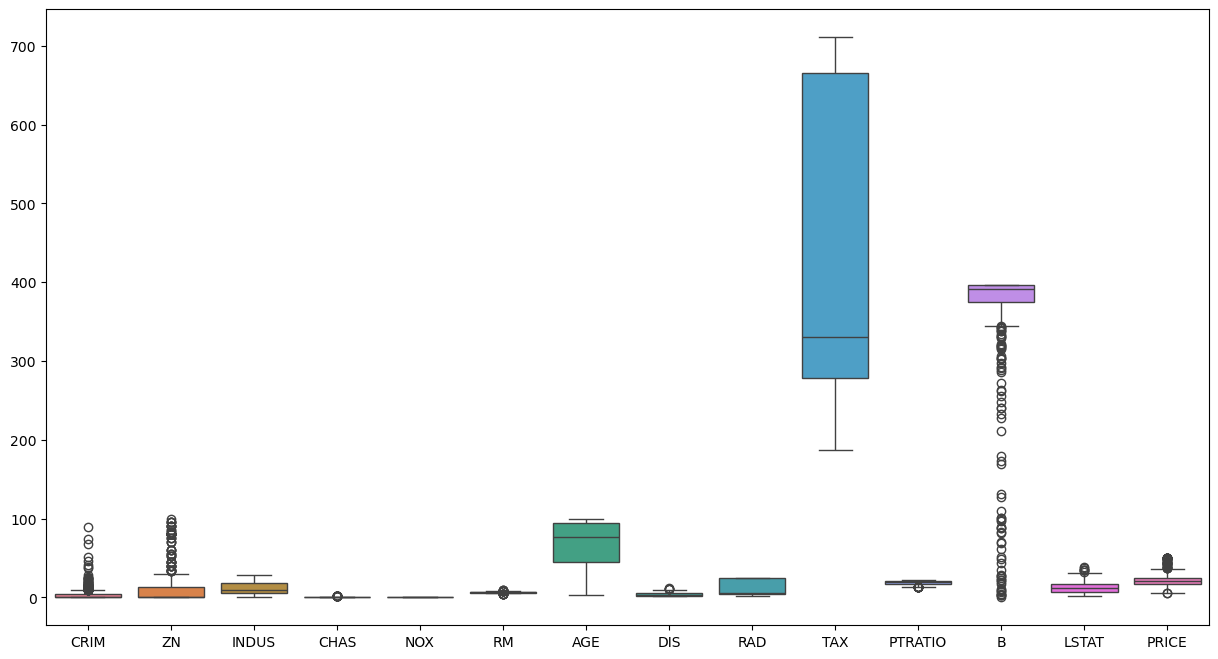

In [9]:
plt.figure(figsize=(15,8))
sns.boxplot(df)
plt.show()

#### 3. Visualize the distribution of target variable (housing prices).

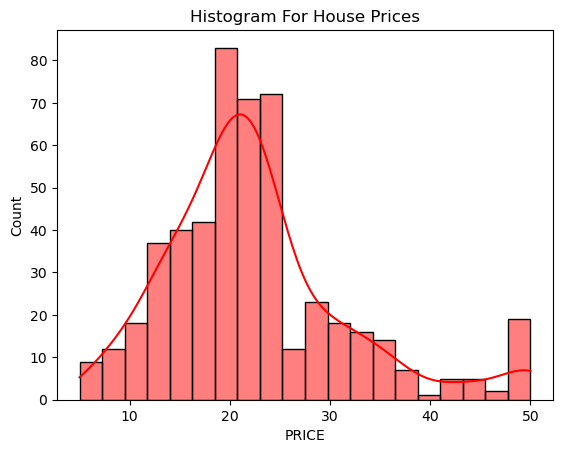

In [10]:
sns.histplot(data = df['PRICE'],kde = True,bins = 20,color = 'red')
plt.title('Histogram For House Prices')
plt.show()

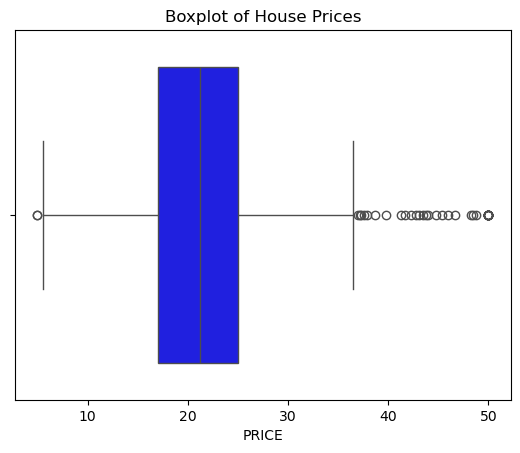

In [11]:
sns.boxplot(x=df['PRICE'], color='blue')
plt.title('Boxplot of House Prices')
plt.show()

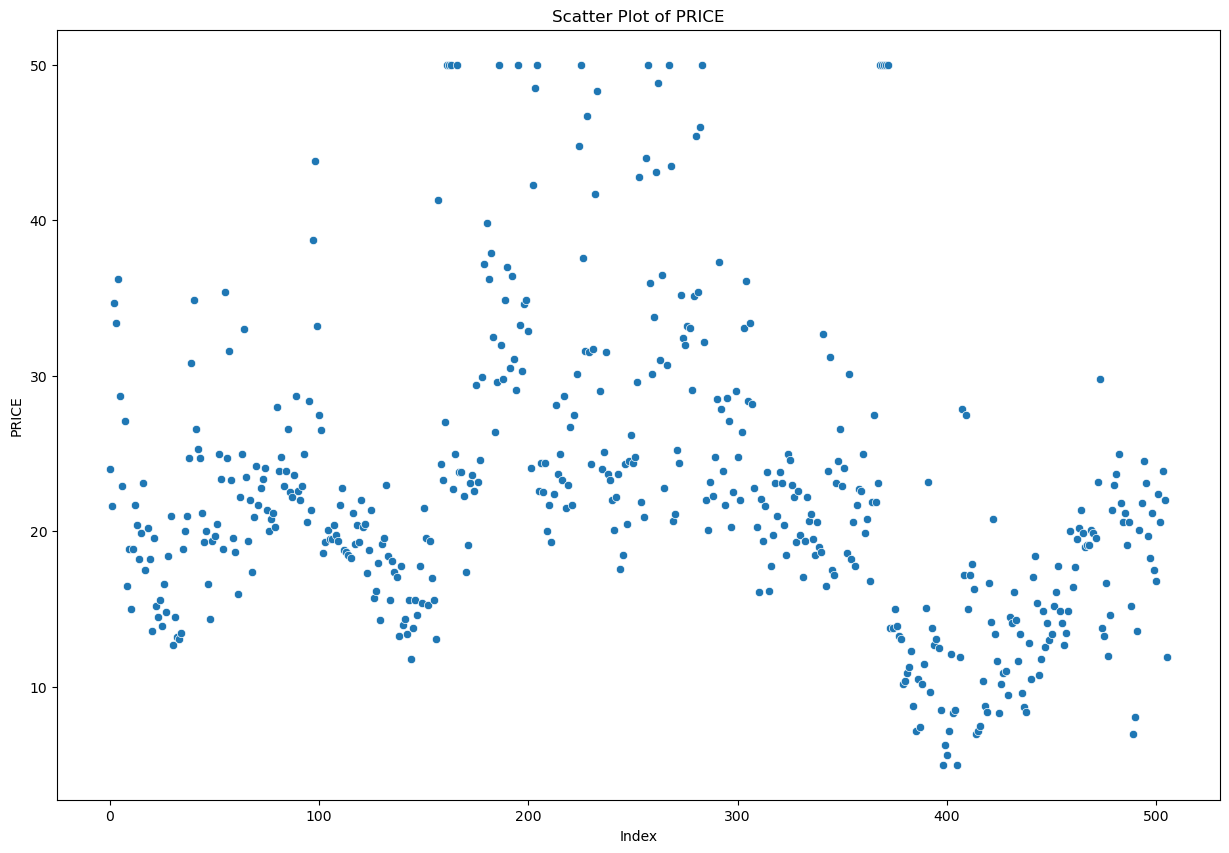

In [12]:
plt.figure(figsize=(15, 10))
sns.scatterplot(x=df.index, y=df["PRICE"])
plt.xlabel("Index")
plt.ylabel("PRICE")
plt.title("Scatter Plot of PRICE")
plt.show()

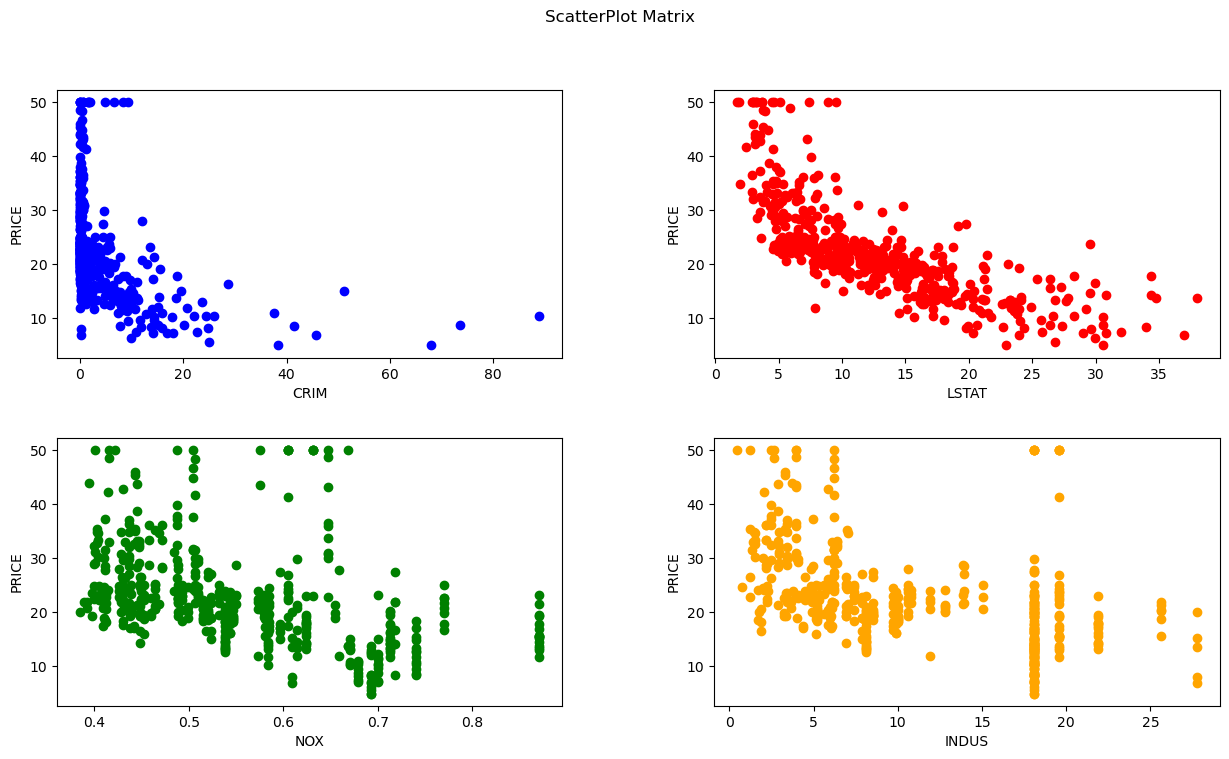

In [13]:
fig = plt.figure(figsize=(15, 8))
gs = fig.add_gridspec(2, 2, hspace=.3, wspace=.3)
(ax1, ax2), (ax3, ax4) = gs.subplots(sharex='none', sharey='none')
fig.suptitle('ScatterPlot Matrix')
ax1.scatter(df["CRIM"], df["PRICE"], c ="blue")
ax1.set(xlabel='CRIM', ylabel='PRICE')
ax2.scatter(df["LSTAT"], df["PRICE"], c ="red")
ax2.set(xlabel='LSTAT', ylabel='PRICE')
ax3.scatter(df["NOX"], df["PRICE"], c ="green")
ax3.set(xlabel='NOX', ylabel='PRICE')
ax4.scatter(df["INDUS"], df["PRICE"], c ="orange")
ax4.set(xlabel='INDUS', ylabel='PRICE')
plt.show()

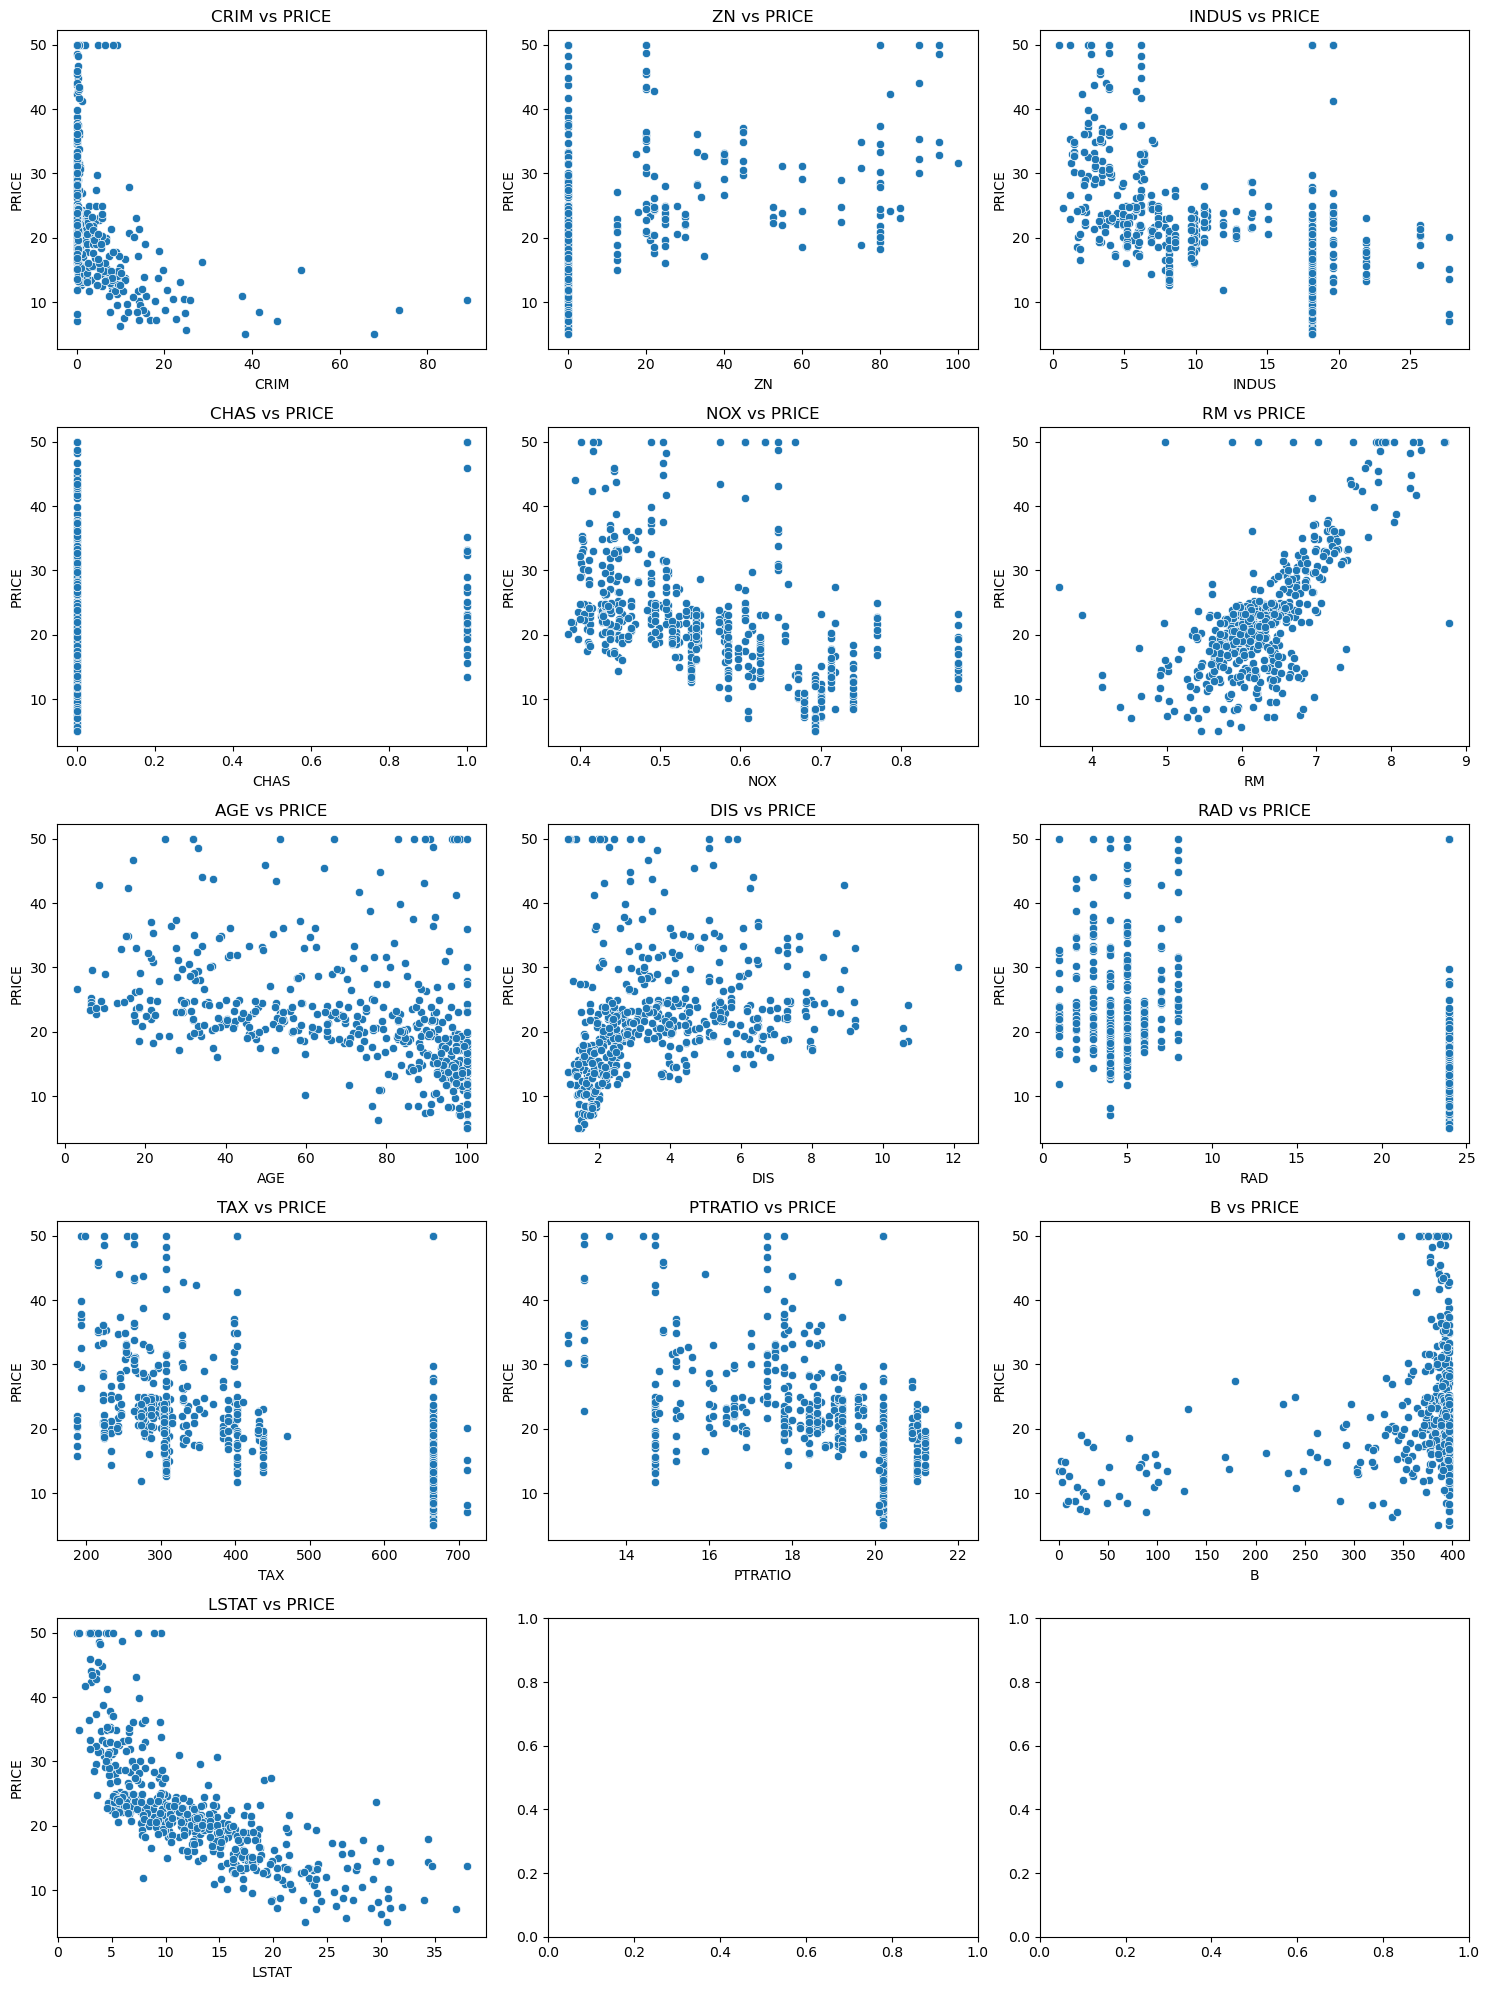

In [14]:
features = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
            'PTRATIO', 'B', 'LSTAT']

fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15, 20))  
axes = axes.flatten() 
for idx, feature in enumerate(features):
    sns.scatterplot(data=df, x=feature, y='PRICE', ax=axes[idx])
    axes[idx].set_title(f'{feature} vs PRICE')

plt.tight_layout()
plt.show()

In [15]:
corr = df.corr()
corr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.191178,0.401863,-0.054355,0.417130,-0.219150,0.354342,-0.374166,0.624765,0.580595,0.281110,-0.381411,0.444943,-0.391363
ZN,-0.191178,1.000000,-0.531871,-0.037229,-0.513704,0.320800,-0.563801,0.656739,-0.310919,-0.312371,-0.414046,0.171303,-0.414193,0.373136
INDUS,0.401863,-0.531871,1.000000,0.059859,0.764866,-0.390234,0.638431,-0.711709,0.604533,0.731055,0.390954,-0.360532,0.590690,-0.481772
CHAS,-0.054355,-0.037229,0.059859,1.000000,0.075097,0.104885,0.078831,-0.093971,0.001468,-0.032304,-0.111304,0.051264,-0.047424,0.181391
NOX,0.417130,-0.513704,0.764866,0.075097,1.000000,-0.302188,0.731548,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.582641,-0.427321
RM,-0.219150,0.320800,-0.390234,0.104885,-0.302188,1.000000,-0.247337,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.614339,0.695360
AGE,0.354342,-0.563801,0.638431,0.078831,0.731548,-0.247337,1.000000,-0.744844,0.458349,0.509114,0.269226,-0.275303,0.602891,-0.394656
DIS,-0.374166,0.656739,-0.711709,-0.093971,-0.769230,0.205246,-0.744844,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.493328,0.249929
RAD,0.624765,-0.310919,0.604533,0.001468,0.611441,-0.209847,0.458349,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.479541,-0.381626
TAX,0.580595,-0.312371,0.731055,-0.032304,0.668023,-0.292048,0.509114,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.536110,-0.468536


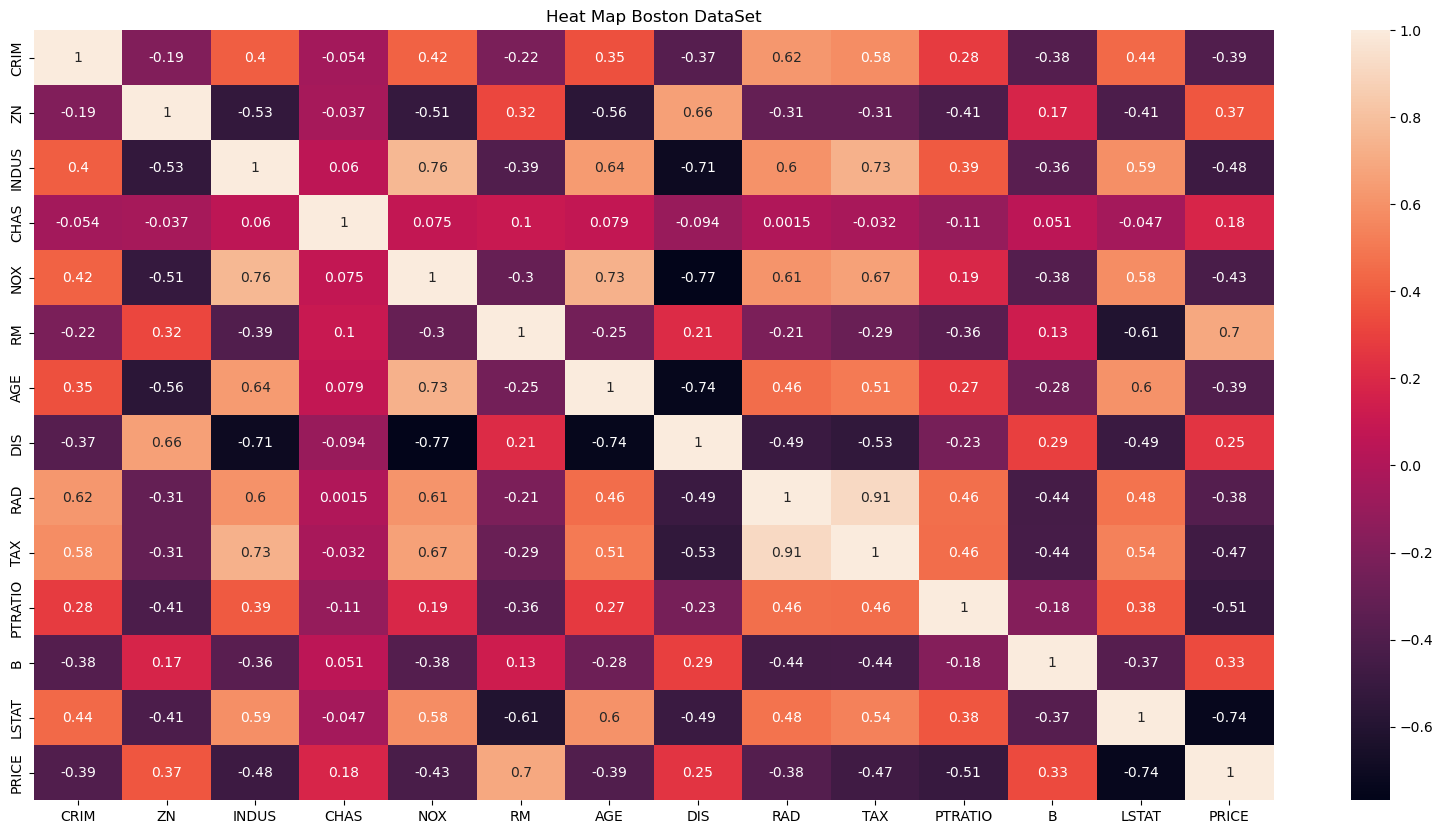

In [16]:
plt.figure(figsize = (20,10))
plt.title('Heat Map Boston DataSet')
sns.heatmap(corr,annot = True)
plt.show()

### Task 2: Data Preprocessing

#### 1. Check for missing values and handle them if necessary.

In [17]:
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
PRICE       0
dtype: int64

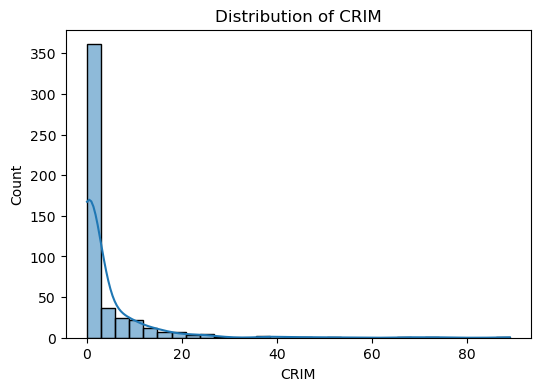

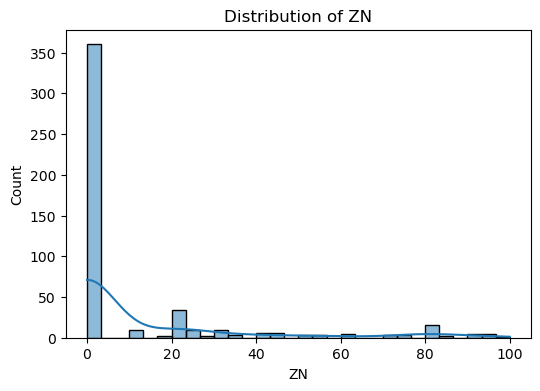

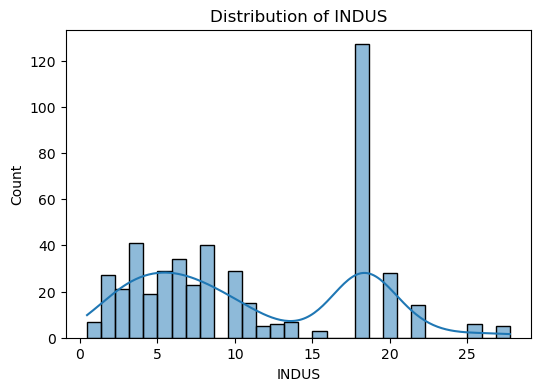

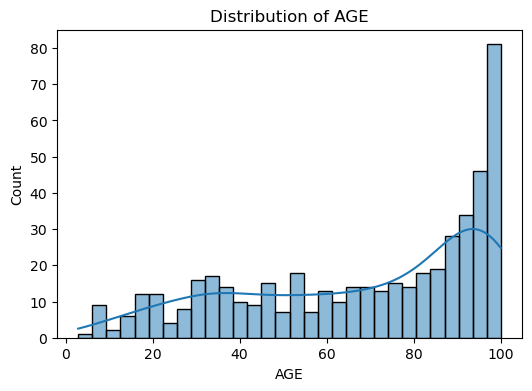

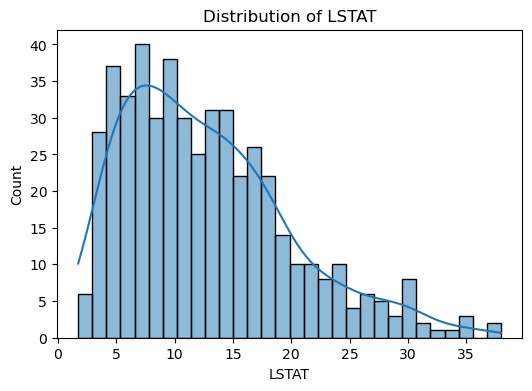

In [18]:
features = ["CRIM", "ZN", "INDUS", "AGE", "LSTAT"]  
for feature in features:  
    plt.figure(figsize=(6, 4))
    sns.histplot(df[feature], bins=30, kde=True)
    plt.title(f"Distribution of {feature}")
    plt.show()

In [19]:
df["CRIM"].fillna(df["CRIM"].median(), inplace=True)
df["ZN"].fillna(df["ZN"].median(), inplace=True)
df["INDUS"].fillna(df["INDUS"].median(), inplace=True)
df["AGE"].fillna(df["AGE"].median(), inplace=True)
df["LSTAT"].fillna(df["LSTAT"].median(), inplace=True)
df["CHAS"].fillna(df["CHAS"].mode()[0], inplace=True)

In [20]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

#### 2. Standardize or normalize numerical features for better performance.

In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT','PRICE']] = scaler.fit_transform(
    df[['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT','PRICE']])

In [22]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,-0.405592,0.314369,-1.301706,0.0,-0.144217,0.413672,-0.132771,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.096193,0.159686
1,-0.403140,-0.468160,-0.591052,0.0,-0.740262,0.194274,0.366141,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.502779,-0.101524
2,-0.403142,-0.468160,-0.591052,0.0,-0.740262,1.282714,-0.282080,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.231709,1.324247
3,-0.402549,-0.468160,-1.321115,0.0,-0.835284,1.016303,-0.839258,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.387195,1.182758
4,-0.398265,-0.468160,-1.321115,0.0,-0.835284,1.228577,-0.533356,1.077737,-0.752922,-1.106115,0.113032,0.441052,-0.176116,1.487503


#### 3. Split the dataset into training (80%) and testing (20%) sets.

In [23]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=["PRICE"])
y = df["PRICE"]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size= 0.2,random_state= 42)

### Task 3: Implement Linear Regression

#### 1. Implement Linear Regression using Scikit-learn.

In [24]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train,y_train)
y_pred = lr_model.predict(X_test)

In [25]:
coefficients = lr_model.coef_
intercept = lr_model.intercept_

print(coefficients)

[-0.10490832  0.07054757 -0.01870313  0.35693057 -0.20131692  0.36036817
 -0.05436351 -0.34485431  0.20659449 -0.16592289 -0.20950314  0.11944471
 -0.33889095]


In [26]:
print(intercept)

-0.031951925948351986


#### 2. Analyze the cost function (Mean Squared Error) and its behavior.

In [27]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test,y_pred)
print("Mean Absolute Error:\n",mae)

Mean Absolute Error:
 0.3427006269536008


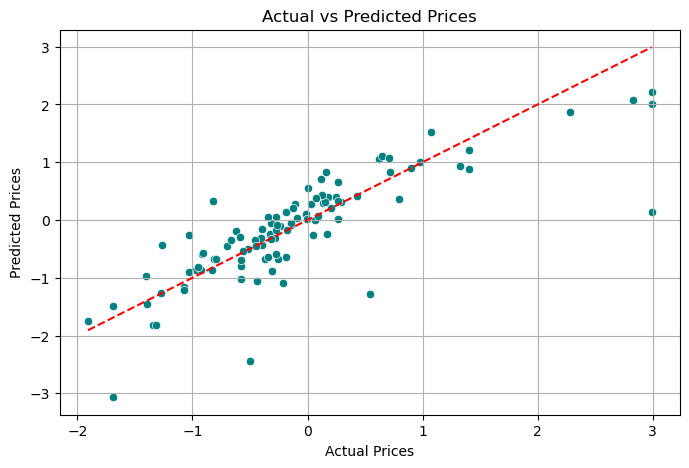

In [31]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=y_test, y=y_pred, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.grid(True)
plt.show()

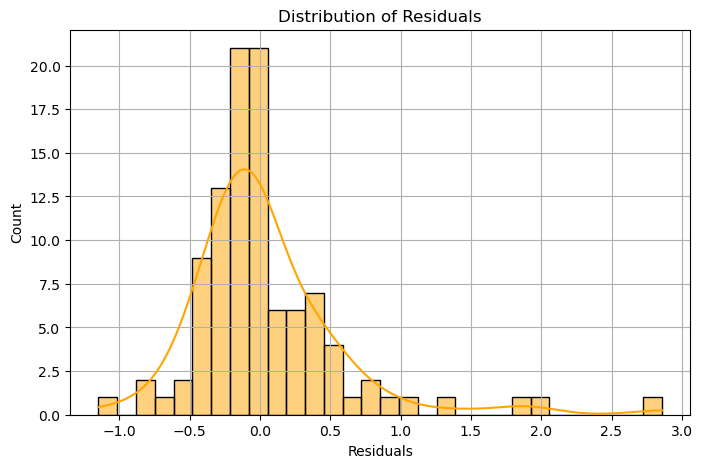

In [32]:
residuals = y_test - y_pred
plt.figure(figsize=(8,5))
sns.histplot(residuals, kde=True, color='orange', bins=30)
plt.title("Distribution of Residuals")
plt.xlabel("Residuals")
plt.grid(True)
plt.show()

### Task 4: Model Evaluation and Interpretation

#### 1. Evaluate model performance using:

In [28]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test,y_pred)
rmse = mse ** 0.5

In [29]:
print("Mean Squared Error:\n",mse)
print("Root Mean Squared Error:\n",rmse)

Mean Squared Error:
 0.2961326252871748
Root Mean Squared Error:
 0.5441806917625568


#### 3. Plot residuals to check for patterns or anomalies.

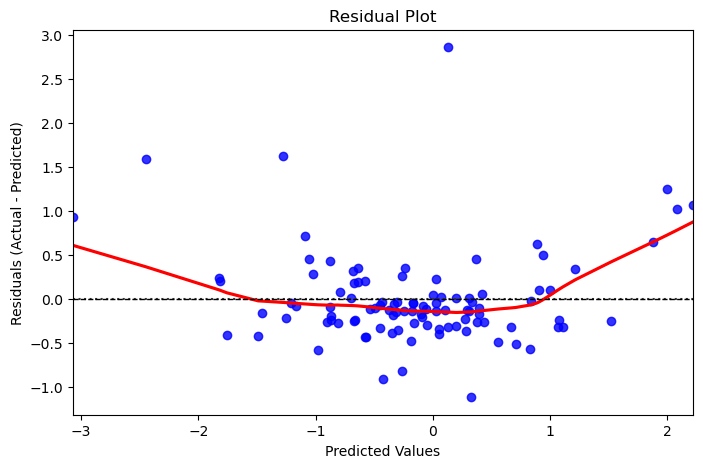

In [30]:
plt.figure(figsize=(8, 5))
sns.residplot(x=y_pred, y=y_test - y_pred, lowess=True, color="blue", line_kws={"color": "red"})
plt.axhline(y=0, color="black", linestyle="--", linewidth=1)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residual Plot")
plt.show()
